# **Project Name**    - E-Commerce Customer Satisfaction Score Prediction



##### **Project Type**    - Deep Learning
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone_Project_Deep_Learning.git

# Project Title:
**DeepCSAT: E-Commerce Customer Satisfaction Score Prediction**

## Overview

This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). In the context of e-commerce, understanding customer satisfaction through their interactions and feedback is crucial for enhancing service quality, customer retention, and overall business growth. By leveraging advanced neural network models, we aim to accurately forecast CSAT scores based on a myriad of interaction-related features, providing actionable insights for service improvement.

## Project Background

Customer satisfaction in the e-commerce sector is a pivotal metric that influences loyalty, repeat business, and word-of-mouth marketing. Traditionally, companies have relied on direct surveys to gauge customer satisfaction, which can be time-consuming and may not always capture the full spectrum of customer experiences. With the advent of deep learning, it's now possible to predict customer satisfaction scores in real-time, offering a granular view of service performance and identifying areas for immediate improvement.

## Dataset Overview

The dataset encompasses customer satisfaction scores over a one-month period on an e-commerce platform named "Shopzilla." It consists of the following features:

- **Unique id**: Unique identifier for each record (integer).
- **Channel name**: Name of the customer service channel (object/string).
- **Category**: Category of the interaction (object/string).
- **Sub-category**: Sub-category of the interaction (object/string).
- **Customer Remarks**: Feedback provided by the customer (object/string).
- **Order id**: Identifier for the order associated with the interaction (integer).
- **Order date time**: Date and time of the order (datetime).
- **Issue reported at**: Timestamp when the issue was reported (datetime).
- **Issue responded**: Timestamp when the issue was responded to (datetime).
- **Survey response date**: Date of the customer survey response (datetime).
- **Customer city**: City of the customer (object/string).
- **Product category**: Category of the product (object/string).
- **Item price**: Price of the item (float).
- **Connected handling time**: Time taken to handle the interaction (float).
- **Agent name**: Name of the customer service agent (object/string).
- **Supervisor**: Name of the supervisor (object/string).
- **Manager**: Name of the manager (object/string).
- **Tenure Bucket**: Bucket categorizing agent tenure (object/string).
- **Agent Shift**: Shift timing of the agent (object/string).
- **CSAT Score**: Customer Satisfaction (CSAT) score (integer).

## Project Goal

The primary goal of this project is to develop a deep learning model that can accurately predict the CSAT scores based on customer interactions and feedback. By doing so, we aim to provide e-commerce businesses with a powerful tool to monitor and enhance customer satisfaction in real-time, thereby improving service quality and fostering customer loyalty.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [1]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M4/project/"

In [2]:
!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M4/project/eCommerce_Customer_support_data.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/AB/spec/M4/project/eCommerce_Customer_support_data.zip
  inflating: eCommerce_Customer_support_data.csv  


In [4]:
# Load Dataset
customer_support_data = pd.read_csv('/content/eCommerce_Customer_support_data.csv')

### Dataset First View

In [5]:
# Dataset First Look
customer_support_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [6]:
customer_support_data.tail()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4
85906,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,NaN,3230db30-f8da-4c44-8636-ec76d1d3d4f3,NaN,31/08/2023 23:36,31/08/2023 23:37,31-Aug-23,NaN,NaN,NaN,NaN,Elizabeth Guerra,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,5


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"Total number of rows: {customer_support_data.shape[0]}")
print(f"Total number of columns: {customer_support_data.shape[1]}")

Total number of rows: 85907
Total number of columns: 20


### Dataset Information

In [8]:
# Dataset Info
customer_support_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
customer_support_data.duplicated().value_counts()

,count
False,85907


In [11]:
customer_support_data.duplicated().sum()

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
customer_support_data.isna().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


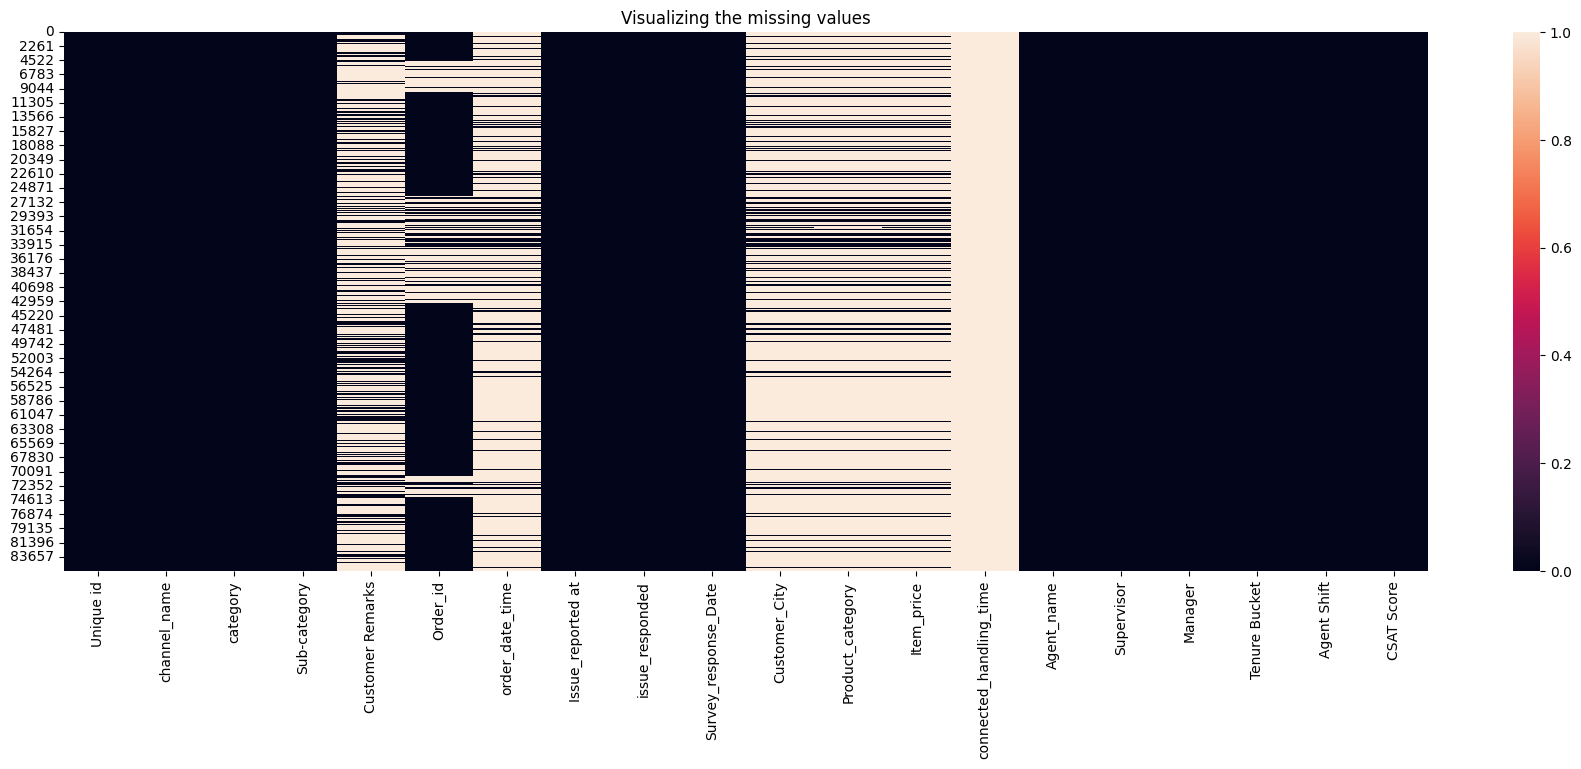

In [16]:
# Visualizing the missing values
plt.figure(figsize=(22,7))
sns.heatmap(customer_support_data.isna(), cbar=True)
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

#### Dataset Summary

- **Total number of rows**: 85,907
- **Total number of columns**: 20
- **Duplicate values**: None

The **target column** for this dataset is the **CSAT Score**.

#### Missing Values Overview

Some features contain missing values, Customer Remarks, Order ID, Order Date/Time, Customer City, Product Category, Item Price, Connected Handling Time.

Other features like **Unique id**, **Channel name**, **Category**, **Sub-category**, **Issue Reported At**, **Issue Responded**, **Survey Response Date**, **Agent Name**, **Supervisor**, **Manager**, **Tenure Bucket**, and **Agent Shift** do not contain any missing values.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
print(f"Dataset all columns name: {list(customer_support_data.columns)} \n")
customer_support_data.info()

Dataset all columns name: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-n

In [20]:
# Dataset Describe
customer_support_data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [21]:
customer_support_data.describe(include=['object'])

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,85907,85907,85907,85907,85907
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,1371,40,6,5,5
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,Wendy Taylor,Carter Park,John Smith,>90,Morning
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,429,4273,25261,30660,41426


### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
customer_support_data.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


In [25]:
# Unique Values for each variable that have less than 100 unique
customer_support_data.columns
column_list = customer_support_data.columns
for column_name in column_list:
  if customer_support_data[column_name].nunique() < 100:
    print(f"the unique values from column_name:'{column_name}' is--> \n {customer_support_data[column_name].unique()} \n")

the unique values from column_name:'channel_name' is--> 
 ['Outcall' 'Inbound' 'Email'] 

the unique values from column_name:'category' is--> 
 ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website'] 

the unique values from column_name:'Sub-category' is--> 
 ['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request'
 'Delayed' 'Service Centres Related' 'Payment related Queries'
 'Order status enquiry' 'Return cancellation' 'Unable to track'
 'Seller Cancelled Order' 'Wrong' 'Invoice request' 'Priority delivery'
 'Refund Related Issues' 'Signup Issues' 'Online Payment Issues'
 'Technician Visit' 'UnProfessional Behaviour' 'Damaged'
 'Product related Issues' 'Refund Enquiry'
 'Customer Requested Modifications' 'Inst

In [31]:
customer_support_data['Survey_response_Date'] = pd.to_datetime(customer_support_data['Survey_response_Date'], format="mixed")

In [33]:
# checking start and end date in this dataset
print(f"start date in dataset ---> {customer_support_data['Survey_response_Date'].min()}")
print(f"last date in dataset ---> {customer_support_data['Survey_response_Date'].max()}")

start date in dataset ---> 2023-08-01 00:00:00
last date in dataset ---> 2023-08-31 00:00:00


## 3. ***Data Wrangling***

### Data Wrangling Code

In [34]:
# created new variables from date columns
customer_support_data['year'] = customer_support_data['Survey_response_Date'].dt.year
customer_support_data['month'] = customer_support_data['Survey_response_Date'].dt.month
customer_support_data['day'] = customer_support_data['Survey_response_Date'].dt.day

In [36]:
# for now we consider when number of unique value is less than 10 then it should be categorical columns
categorical_cols = [col for col in customer_support_data.columns if customer_support_data[col].nunique() < 10]
numeric_cols = list(set(customer_support_data.columns)-set(categorical_cols))

In [38]:
print(categorical_cols)

['channel_name', 'Product_category', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score', 'year', 'month']


In [39]:
print(numeric_cols)

['connected_handling_time', 'Supervisor', 'Item_price', 'issue_responded', 'Agent_name', 'Survey_response_Date', 'Issue_reported at', 'Unique id', 'category', 'Customer Remarks', 'Sub-category', 'day', 'Order_id', 'order_date_time', 'Customer_City']
